This file tests out the hts-db installation

In [ ]:
import sys

%load_ext autoreload
%autoreload 2
%load_ext sql 
%pylab inline
%matplotlib inline

import pandas as pd
import pickle,time
import pymongo 

import pylab as pl

FT1=['p53Act','DNADamage','StressKinase','OxidativeStress','MicrotubuleCSK','LysosomalMass',
     'MitoMass','MitoMembPot','MitoFxnI','Steatosis',
     'MitoticArrest','CellCycleArrest','NuclearSize','DNATexture','Apoptosis','CellLoss']


In [11]:
# This package contains the object (i.e. schema) definition for the database

from bio.data.htsdb import *

# This pacakge contains the functions for retrieving and displaying the data 
import bio.comp.hts as hts


In [12]:
# Count the number of Plates 
HtsPlate.objects.count()

416

In [65]:
# Find Troglitazone
print hts.getChem('troglitazone')
# Now get the chemical object with the eid 
TGTZ = HtsChem.objects(eid='TX006205').first()

[(u'Troglitazone', u'TX006205')]


In [67]:
# Get the plates containing troglitazone
Plates0 = HtsPlate.objects(chems=TGTZ)
Plates0

[<HtsPlate: HtsPlate object>, <HtsPlate: HtsPlate object>, <HtsPlate: HtsPlate object>, <HtsPlate: HtsPlate object>]

In [68]:
# Which assays are on the first plate ? 
[A.name for A in Plates0[0].assays]

[u'Apredica OxidativeStress',
 u'Apredica p53Act',
 u'Apredica CellCycleArrest',
 u'Apredica CellLoss',
 u'Apredica StressKinase',
 u'Apredica NuclearSize']

In [69]:
# Find all assays for Troglitazone
[(A.eid,A.name) for A in HtsPlate.objects(chems=TGTZ).distinct('assays')]

[(u'CellCycleArrest', u'Apredica CellCycleArrest'),
 (u'CellLoss', u'Apredica CellLoss'),
 (u'NuclearSize', u'Apredica NuclearSize'),
 (u'OxidativeStress', u'Apredica OxidativeStress'),
 (u'StressKinase', u'Apredica StressKinase'),
 (u'p53Act', u'Apredica p53Act'),
 (u'MicrotubuleCSK', u'Apredica MicrotubuleCSK'),
 (u'MitoMass', u'Apredica MitoMass'),
 (u'MitoMembPot', u'Apredica MitoMembPot'),
 (u'MitoticArrest', u'Apredica MitoticArrest')]

In [54]:
# Get the p53Activation assay object
P53 = HtsAssay.objects(eid='p53Act').first()

In [70]:
# Find the normalized concentration response data for TGTZ for the p53 endpoint
for CRCi in HtsConcRespCurveNrm.objects(chem=TGTZ,assay=P53):
    print CRCi.timeh

24.0
72.0


In [77]:
# Get the concentration response data as a pandas dataframe
X=hts.getChemConcResp(u'TX006205',ret='df')

In [78]:
# Get the percentage change data 
X[('ppct')]

timeh                                                         24.0            \
assay_id                                           CellCycleArrest  CellLoss   
chem_id hchem_id chem_name    chem_casrn lconc                                 
3328    TX006205 Troglitazone 97322-87-7 -6.407823        0.239099  0.927296   
                                         -6.107349        0.237880  0.922468   
                                         -5.806875        0.241273  0.920025   
                                         -5.504456        0.249372  0.918011   
                                         -5.204120        0.257248  0.907064   
                                         -4.903090        0.262698  0.879071   
                                         -4.602060        0.265682  0.835465   
                                         -4.301030        0.249786  0.774680   
                                         -4.000000        0.200230  0.672528   
                                         -3.698970        0.133480  0.524804   

timeh                                                                        \
assay_id                                           MicrotubuleCSK  MitoMass   
chem_id hchem_id chem_name    chem_casrn lconc                                
3328    TX006205 Troglitazone 97322-87-7 -6.407823       0.541501  0.214457   
                                         -6.107349       0.527029  0.227181   
                                         -5.806875       0.499066  0.246462   
                                         -5.504456       0.474675  0.261533   
                                         -5.204120       0.474336  0.261203   
                                         -4.903090       0.494631  0.245708   
                                         -4.602060       0.507373  0.221675   
                                         -4.301030       0.498432  0.203010   
                                         -4.000000       0.448662  0.222137   
                                         -3.698970       0.331878  0.298151   

timeh                                                                         \
assay_id                                           MitoMembPot MitoticArrest   
chem_id hchem_id chem_name    chem_casrn lconc                                 
3328    TX006205 Troglitazone 97322-87-7 -6.407823    0.389415      0.004196   
                                         -6.107349    0.524093      0.012049   
                                         -5.806875    0.700091      0.020032   
                                         -5.504456    0.829099      0.027554   
                                         -5.204120    0.871587      0.036002   
                                         -4.903090    0.852133      0.039740   
                                         -4.602060    0.776275      0.028452   
                                         -4.301030    0.628495      0.009173   
                                         -4.000000    0.428821      0.031543   
                                         -3.698970    0.213782      0.126580   

timeh                                                           \
assay_id                                           NuclearSize   
chem_id hchem_id chem_name    chem_casrn lconc                   
3328    TX006205 Troglitazone 97322-87-7 -6.407823    0.663280   
                                         -6.107349    0.650171   
                                         -5.806875    0.631976   
                                         -5.504456    0.619587   
                                         -5.204120    0.622879   
                                         -4.903090    0.638324   
                                         -4.602060    0.657132   
                                         -4.301030    0.681782   
                                         -4.000000    0.656222   
                                         -3.698970    0.511810   

timeh                          

In [79]:
# Get the assay results 
AR=hts.getChemAssayResults('TX006205')

In [82]:
AR[('hit_call')]

timeh                                               24.0           \
assay_id                                 CellCycleArrest CellLoss   
chem_id hchem_id chem_name    chem_casrn                            
3328    TX006205 Troglitazone 97322-87-7               0        0   

timeh                                                                         \
assay_id                                 MicrotubuleCSK MitoMass MitoMembPot   
chem_id hchem_id chem_name    chem_casrn                                       
3328    TX006205 Troglitazone 97322-87-7              0        0           1   

timeh                                                               \
assay_id                                 MitoticArrest NuclearSize   
chem_id hchem_id chem_name    chem_casrn                             
3328    TX006205 Troglitazone 97322-87-7             0           0   

timeh                                                                         \
assay_id                                 OxidativeStress StressKinase p53Act   
chem_id hchem_id chem_name    chem_casrn                                       
3328    TX006205 Troglitazone 97322-87-7               0            0      0   

timeh                                               72.0           \
assay_id                                 CellCycleArrest CellLoss   
chem_id hchem_id chem_name    chem_casrn                            
3328    TX006205 Troglitazone 97322-87-7               0        1   

timeh                                                                         \
assay_id                                 MicrotubuleCSK MitoMass MitoMembPot   
chem_id hchem_id chem_name    chem_casrn                                       
3328    TX006205 Troglitazone 97322-87-7              0        0           0   

timeh                                                               \
assay_id                                 MitoticArrest NuclearSize   
chem_id hchem_id chem_name    chem_casrn                             
3328    TX006205 Troglitazone 97322-87-7             1           0   

timeh                                                                         
assay_id                                 OxidativeStress StressKinase p53Act  
chem_id hchem_id chem_name    chem_casrn                                      
3328    TX006205 Troglitazone 97322-87-7               1            0      1

No LEC data


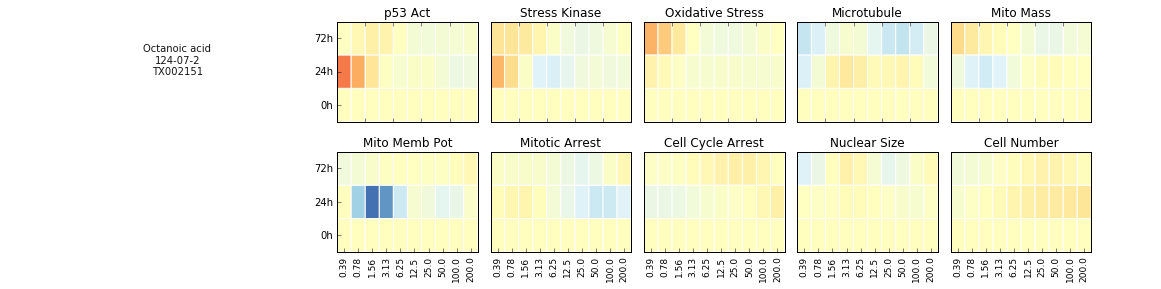

In [85]:
# Plot the conc response for Octanoic acid
hts.plotHtsConcRespHM('TX002151',exp_id='APR-HepG2-PhII',add_t0=True,loc=None)

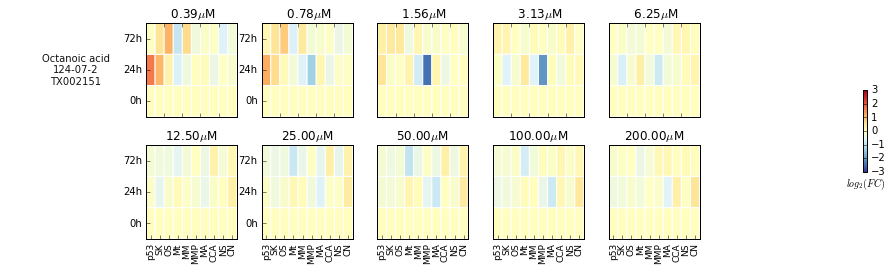

In [22]:
FTLB3 = dict(zip(FT1,['p53','SK','OS','Mt','MM','MMP','MA','CCA','NS','CN']))
hts.plotHtsTrajHM('TX002151',exp_id='APR-HepG2-PhII',add_t0=True,cb=True,use_resp='slfc',
                  draw_chem=False,FTLB=FTLB3,
                  fs=1.1,xyoff=[2,-4],fgsz=[15,3],loc=None)